# TRABAJO PRACTICO N°4 

In [ ]:
PUNTO 1 

In [2]:
import pandas as pd
# Para 2004
with pd.ExcelWriter('bases_2004.xlsx') as writer:
    X_2004_train.to_excel(writer, sheet_name='X_train_2004', index=False)
    X_2004_test.to_excel(writer, sheet_name='X_test_2004', index=False)
    y_2004_train.to_excel(writer, sheet_name='y_train_2004', index=False)
    y_2004_test.to_excel(writer, sheet_name='y_test_2004', index=False)

# Para 2024
with pd.ExcelWriter('bases_2024.xlsx') as writer:
    X_2024_train.to_excel(writer, sheet_name='X_train_2024', index=False)
    X_2024_test.to_excel(writer, sheet_name='X_test_2024', index=False)
    y_2024_train.to_excel(writer, sheet_name='y_train_2024', index=False)
    y_2024_test.to_excel(writer, sheet_name='y_test_2024', index=False)

print("Bases guardadas exitosamente en archivos Excel")

IndexError: At least one sheet must be visible

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats

# Cargar datos
df_2004 = pd.read_excel('archivo_17.xlsx', sheet_name='2004_procesado')
df_2024 = pd.read_excel('archivo_17.xlsx', sheet_name='Respondieron_2024_proc')

# Función para procesar cada año
def procesar_año(df, año):
    # Dividir en train y test (70/30)
    train, test = train_test_split(df, test_size=0.3, random_state=444)
    
    # Variables 
    variables = ['salario_semanal', 'educ', 'edad2', 'horas_trab']
    
    # Crear tabla de diferencias
    resultados = []
    
    for var in variables:
        # Calcular estadísticas
        media_train = train[var].mean()
        media_test = test[var].mean()
        n_train = len(train)
        n_test = len(test)
        sd_train = train[var].std()
        sd_test = test[var].std()
        
        # Test t para diferencia de medias
        t_stat, p_value = stats.ttest_ind(train[var], test[var], equal_var=False)
        
        resultados.append({
            'Variable': var,
            'Media Train': round(media_train, 2),
            'Media Test': round(media_test, 2),
            'n Train': n_train,
            'n Test': n_test,
            'SD Train': round(sd_train, 2),
            'SD Test': round(sd_test, 2),
            'p-value': round(p_value, 4)
        })
    
    # Convertir a DataFrame
    tabla = pd.DataFrame(resultados)
    
    # Guardar en Excel
    tabla.to_excel(f'diferencias_medias_{año}.xlsx', index=False)
    
    return tabla

# Procesar ambos años
tabla_2004 = procesar_año(df_2004, '2004')
tabla_2024 = procesar_año(df_2024, '2024')

# Mostrar tablas
print("2004:")
print(tabla_2004)
print("\n2024:")
print(tabla_2024)

2004:
          Variable  Media Train  Media Test  n Train  n Test  SD Train  \
0  salario_semanal      5364.20     5082.76    10374    4447  12007.92   
1             educ         7.52        7.45    10374    4447      5.10   
2            edad2      1620.59     1627.44    10374    4447   1809.16   
3       horas_trab        15.51       15.00    10374    4447     41.87   

    SD Test  p-value  
0  10495.34   0.1524  
1      5.00      NaN  
2   1822.37      NaN  
3     37.46   0.4617  

2024:
          Variable  Media Train  Media Test  n Train  n Test  SD Train  \
0  salario_semanal      2912.21     2935.25     9090    3897   5547.95   
1             educ         7.78        7.78     9090    3897      3.47   
2            edad2      1814.57     1813.91     9090    3897   1925.57   
3       horas_trab        13.05       13.10     9090    3897     20.45   

   SD Test  p-value  
0  5479.18   0.8268  
1     3.50      NaN  
2  1955.50   0.9859  
3    20.66   0.9011  


In [ ]:
PUNTO 2

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

archivo_2004 = r"C:\Users\HP\OneDrive\Documentos\Big data\TPS\TP4\bases_2004.xlsx"
archivo_2024 = r"C:\Users\HP\OneDrive\Documentos\Big data\TPS\TP4\bases_2024.xlsx"

X_train_2004 = pd.read_excel(archivo_2004, sheet_name="X_train_2004")
X_train_2024 = pd.read_excel(archivo_2024, sheet_name="X_train_2024")

modelos = {"modelo_1": ["edad"],"modelo_2": ["edad", "edad2"],"modelo_3": ["edad", "edad2", "educ"], "modelo_4": ["edad", "edad2", "educ", "Mujer"],  "modelo_5": ["edad", "edad2", "educ", "itf", "rdecifr"],
}


def entrenar_modelos(df, año):
    print(f"\nResultados para {año}:")
  
    nombre_itf = "itf" if año == 2004 else "ITF"
    nombre_rdecifr = "rdecifr" if año == 2004 else "RDECIFR"

       # Crear variable Mujer (1 si CHO4 == 2, 0 en otro caso)
    if 'CH04' in df.columns:
        df['Mujer'] = (df['CH04'] == 2).astype(int)
    
    for nombre, variables in modelos.items():
        vars_ajustadas = []
        for v in variables:
            if v.lower() == "itf":
                vars_ajustadas.append(nombre_itf)
            elif v.lower() == "rdecifr":
                vars_ajustadas.append(nombre_rdecifr)
            else:
                vars_ajustadas.append(v)
        
        columnas = vars_ajustadas + ["salario_semanal"]
        
        # Verificar que todas las columnas existan antes de continuar
        columnas_existentes = [col for col in columnas if col in df.columns]
        if len(columnas_existentes) < len(columnas):
            faltantes = set(columnas) - set(columnas_existentes)
            print(f"  Omitiendo modelo {nombre} porque faltan columnas: {faltantes}")
            continue
        
        df_modelo = df[columnas_existentes].dropna()  
        X = df_modelo[vars_ajustadas]
        y = df_modelo["salario_semanal"]

        modelo = LinearRegression()
        modelo.fit(X, y)
        predicciones = modelo.predict(X)
        r2 = r2_score(y, predicciones)

        print(f"\n{nombre.upper()} - Variables: {variables}")
        print("Coeficientes:", modelo.coef_)
        print("Intercepto:", modelo.intercept_)
        print("R²:", round(r2, 4))

# Ejecutamos finalmente
entrenar_modelos(X_train_2004, 2004)
entrenar_modelos(X_train_2024, 2024)


Resultados para 2004:

MODELO_1 - Variables: ['edad']
Coeficientes: [88.40508617]
Intercepto: 2475.771157800993
R²: 0.0261

MODELO_2 - Variables: ['edad', 'edad2']
Coeficientes: [727.8441699   -8.11283159]
Intercepto: -5906.719611122138
R²: 0.1378

MODELO_3 - Variables: ['edad', 'edad2', 'educ']
Coeficientes: [785.40456312  -8.70874168 422.39942094]
Intercepto: -10242.808256240958
R²: 0.1271
  Omitiendo modelo modelo_4 porque faltan columnas: {'Mujer'}

MODELO_5 - Variables: ['edad', 'edad2', 'educ', 'itf', 'rdecifr']
Coeficientes: [ 765.83701531   -8.26940271  216.2058548     6.58949584 -263.32171378]
Intercepto: -14605.897637629834
R²: 0.3471

Resultados para 2024:

MODELO_1 - Variables: ['edad']
Coeficientes: [35.47655067]
Intercepto: 1641.6500473452707
R²: 0.0218

MODELO_2 - Variables: ['edad', 'edad2']
Coeficientes: [380.71508286  -4.2959058 ]
Intercepto: -2927.543848982568
R²: 0.1849

MODELO_3 - Variables: ['edad', 'edad2', 'educ']
Coeficientes: [293.27700403  -3.32600998 100.68

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

archivo_2004 = "bases_20042.xlsx"
archivo_2024 = "bases_20242.xlsx"

X_train_2004 = pd.read_excel(archivo_2004, sheet_name="X_train_2004")
X_train_2024 = pd.read_excel(archivo_2024, sheet_name="X_train_2024")

modelos = {
    "modelo_4": ["edad", "edad2", "educ", "Mujer"], 
}

def entrenar_modelos(df, año):
    print(f"\nResultados para {año}:")
  
    nombre_itf = "itf" if año == 2004 else "ITF"
    nombre_rdecifr = "rdecifr" if año == 2004 else "RDECIFR"
    
    # Crear variable Mujer (1 si CHO4 == 2, 0 en otro caso)
    if 'CH04' in df.columns:
        df['Mujer'] = (df['CH04'] == 2).astype(int)
    
    for nombre, variables in modelos.items():
        vars_ajustadas = []
        for v in variables:
            if v.lower() == "itf":
                vars_ajustadas.append(nombre_itf)
            elif v.lower() == "rdecifr":
                vars_ajustadas.append(nombre_rdecifr)
            else:
                vars_ajustadas.append(v)
        
        columnas = vars_ajustadas + ["salario_semanal"]
        
        # Verificar que todas las columnas existan antes de continuar
        columnas_existentes = [col for col in columnas if col in df.columns]
        if len(columnas_existentes) < len(columnas):
            faltantes = set(columnas) - set(columnas_existentes)
            print(f"  Omitiendo modelo {nombre} porque faltan columnas: {faltantes}")
            continue
        
        df_modelo = df[columnas_existentes].dropna()  
        X = df_modelo[vars_ajustadas]
        y = df_modelo["salario_semanal"]

        modelo = LinearRegression()
        modelo.fit(X, y)
        predicciones = modelo.predict(X)
        r2 = r2_score(y, predicciones)

        print(f"\n{nombre.upper()} - Variables: {variables}")
        print("Coeficientes:", modelo.coef_)
        print("Intercepto:", modelo.intercept_)
        print("R²:", round(r2, 4))

# Ejecutamos finalmente
entrenar_modelos(X_train_2004, 2004)
entrenar_modelos(X_train_2024, 2024)


Resultados para 2004:

MODELO_4 - Variables: ['edad', 'edad2', 'educ', 'Mujer']
Coeficientes: [  775.77622385    -8.53565138   441.82116213 -6054.13343723]
Intercepto: -7148.259745978601
R²: 0.1784

Resultados para 2024:

MODELO_4 - Variables: ['edad', 'edad2', 'educ', 'Mujer']
Coeficientes: [  284.87757806    -3.19259208   110.79725294 -1776.40558605]
Intercepto: -2265.6616121124935
R²: 0.2429


In [ ]:
PUNTO 3 

In [5]:
#PREDICCION 2004 
import numpy as np
import pandas as pd

# Cargar los datos
archivo_2004 = 'bases_2004ss.xlsx'
x_train_04 = pd.read_excel(archivo_2004, sheet_name='X_train_2004')
x_test_04 = pd.read_excel(archivo_2004, sheet_name='X_test_2004')
y_train_04 = pd.read_excel(archivo_2004, sheet_name='y_train_2004')['salario_semanal']
y_test_04 = pd.read_excel(archivo_2004, sheet_name='y_test_2004')['salario_semanal']

# Crear variable Mujer si no existe
if 'Mujer' not in x_train_04.columns and 'CH04' in x_train_04.columns:
    x_train_04['Mujer'] = (x_train_04['CH04'] == 2).astype(int)
    x_test_04['Mujer'] = (x_test_04['CH04'] == 2).astype(int)

#Filtrar filas con salario_semanal > 0
filtro_validos = y_test_04 > 0
x_test_04 = x_test_04.loc[filtro_validos].reset_index(drop=True)
y_test_04 = y_test_04.loc[filtro_validos].reset_index(drop=True)

# Definición de modelos y coeficientes
modelos_coeficientes = {
    "Modelo_1": {
        "variables": ["edad"],
        "coef": [88.40508617],
        "intercepto": 2475.771157800993
    },
    "Modelo_2": {
        "variables": ["edad", "edad2"],
        "coef": [727.8441699, -8.11283159],
        "intercepto": -5906.719611122138
    },
    "Modelo_3": {
        "variables": ["edad", "edad2", "educ"],
        "coef": [785.40456312, -8.70874168, 422.39942094],
        "intercepto": -10242.808256240958
    },
    "Modelo_4": {
        "variables": ["edad", "edad2", "educ", "Mujer"],
        "coef": [775.77622385, -8.53565138, 441.82116213, -6054.13343723],
        "intercepto": -7148.259745978601
    },
    "Modelo_5": {
        "variables": ["edad", "edad2", "educ", "itf", "rdecifr"],
        "coef": [765.83701531, -8.26940271, 216.2058548, 6.58949584, -263.32171378],
        "intercepto": -14605.897637629834
    }
}

# Crear DataFrame para guardar resultados
predicciones_2004 = pd.DataFrame()
predicciones_2004['salario_semanal'] = y_test_04.reset_index(drop=True)

# Calcular predicciones para cada modelo
for nombre, datos in modelos_coeficientes.items():
    variables = datos["variables"]
    coef = np.array(datos["coef"])
    inter = datos["intercepto"]

    # Extraer variables, eliminar filas con NA para evitar errores
    X_modelo = x_test_04[variables].copy().dropna()

    # Calcular predicciones
    y_pred = np.dot(X_modelo, coef) + inter

    # Crear Serie con índices del test original, asignar predicciones solo donde hay datos completos
    y_pred_full = pd.Series(index=x_test_04.index, dtype=float)
    y_pred_full.loc[X_modelo.index] = y_pred

    # Agregar predicciones al DataFrame, reseteando índices para que coincidan con predicciones_2004
    predicciones_2004[nombre] = y_pred_full.reset_index(drop=True)

predicciones_2004.to_excel("predicciones2_2004.xlsx", index=False)

In [3]:
#PREDICCION 2024
import numpy as np
import pandas as pd

# Cargar los datos 2024
archivo_2024 = 'bases_2024ss.xlsx'
x_train_24 = pd.read_excel(archivo_2024, sheet_name='X_train_2024')
x_test_24 = pd.read_excel(archivo_2024, sheet_name='X_test_2024')
y_train_24 = pd.read_excel(archivo_2024, sheet_name='y_train_2024')['salario_semanal']
y_test_24 = pd.read_excel(archivo_2024, sheet_name='y_test_2024')['salario_semanal']

# Crear variable Mujer si no existe y está disponible (supongo CH04 también está)
if 'Mujer' not in x_train_24.columns and 'CH04' in x_train_24.columns:
    x_train_24['Mujer'] = (x_train_24['CH04'] == 2).astype(int)
    x_test_24['Mujer'] = (x_test_24['CH04'] == 2).astype(int)

# Filtrar casos donde salario_semanal es mayor que 0

#Filtrar filas con salario_semanal > 0
filtro_validos = y_test_24 > 0
x_test_24 = x_test_24.loc[filtro_validos].reset_index(drop=True)
y_test_24 = y_test_24.loc[filtro_validos].reset_index(drop=True)


# Definición de modelos y coeficientes para 2024
modelos_coeficientes_24 = {
    "Modelo_1": {
        "variables": ["edad"],
        "coef": [35.47655067],
        "intercepto": 1641.6500473452707
    },
    "Modelo_2": {
        "variables": ["edad", "edad2"],
        "coef": [380.71508286, -4.2959058],
        "intercepto": -2927.543848982568
    },
    "Modelo_3": {
        "variables": ["edad", "edad2", "educ"],
        "coef": [293.27700403, -3.32600998, 100.68190654],
        "intercepto": -3136.919292244087
    },
    "Modelo_3_ext": {  # El que nombraste como MODELO_3 con Mujer incluido
        "variables": ["edad", "edad2", "educ", "Mujer"],
        "coef": [284.87757806, -3.19259208, 110.79725294, -1776.40558605],
        "intercepto": -2265.6616121124935
    },
    "Modelo_5": {
        "variables": ["edad", "edad2", "educ", "ITF", "RDECIFR"],
        "coef": [294.625122, -3.27650161, 68.5647118, 0.00280956397, 98.8938614],
        "intercepto": -4912.859276135149
    }
}

# DataFrame para guardar predicciones 2024
predicciones_2024 = pd.DataFrame()
predicciones_2024['salario_semanal'] = y_test_24.reset_index(drop=True)

# Calcular predicciones para cada modelo
for nombre, datos in modelos_coeficientes_24.items():
    variables = datos["variables"]
    coef = np.array(datos["coef"])
    inter = datos["intercepto"]

    X_modelo = x_test_24[variables].copy().dropna()
    y_pred = np.dot(X_modelo, coef) + inter

    y_pred_full = pd.Series(index=x_test_24.index, dtype=float)
    y_pred_full.loc[X_modelo.index] = y_pred

    predicciones_2024[nombre] = y_pred_full.reset_index(drop=True)

# Guardar predicciones a Excel
predicciones_2024.to_excel("predicciones2_2024.xlsx", index=False)

print("Archivo 'predicciones2_2024.xlsx' creado con las predicciones para 2024.")

Archivo 'predicciones2_2024.xlsx' creado con las predicciones para 2024.


In [2]:
#METRICAS 2024
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Cargar datos
archivo_2024 = 'bases_2024ss.xlsx'
x_train_24 = pd.read_excel(archivo_2024, sheet_name='X_train_2024')
y_train_24 = pd.read_excel(archivo_2024, sheet_name='y_train_2024').squeeze()
x_test_24 = pd.read_excel(archivo_2024, sheet_name='X_test_2024')
y_test_24 = pd.read_excel(archivo_2024, sheet_name='y_test_2024').squeeze()

# Añadir variables derivadas si no están
if 'edad2' not in x_train_24.columns:
    x_train_24['edad2'] = x_train_24['edad'] ** 2
    x_test_24['edad2'] = x_test_24['edad'] ** 2

if 'Mujer' not in x_train_24.columns and 'CH04' in x_train_24.columns:
    x_train_24['Mujer'] = (x_train_24['CH04'] == 2).astype(int)
    x_test_24['Mujer'] = (x_test_24['CH04'] == 2).astype(int)

# Definición de modelos
modelos = {
    "Modelo 1": ["edad"],
    "Modelo 2": ["edad", "edad2"],
    "Modelo 3": ["edad", "edad2", "educ"],
    "Modelo 4": ["edad", "edad2", "educ", "Mujer"],
    "Modelo 5": ["edad", "edad2", "educ", "ITF", "RDECIFR"] 
}

# Resultados
resultados = []

for nombre_modelo, vars_modelo in modelos.items():
    try:
        # 1. Filtrar variables y eliminar NaN
        x_train_model = x_train_24[vars_modelo].dropna()
        y_train_model = y_train_24.loc[x_train_model.index]
        x_test_model = x_test_24[vars_modelo].dropna()
        y_test_model = y_test_24.loc[x_test_model.index]
        
        # 2. Entrenar modelo
        lreg = LinearRegression()
        lreg.fit(x_train_model, y_train_model)
        
        # 3. Predecir y calcular métricas
        y_pred = lreg.predict(x_test_model)
        
        mse = mean_squared_error(y_test_model, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test_model, y_pred)
        
        # Guardar resultados
        resultados.append({
            'anio': 2024,
            'Modelo': nombre_modelo,
            'MSE': round(mse, 4),
            'RMSE': round(rmse, 4),
            'MAE': round(mae, 4),
            'Filas_train': len(x_train_model),
            'Filas_test': len(x_test_model)
        })
        
    except KeyError as e:
        print(f" Error en {nombre_modelo}: Falta la variable {e}")

# Mostrar resultados
df_resultados = pd.DataFrame(resultados)
print(f"\nResultados para 2024:")
print(df_resultados.to_markdown(index=False))


Resultados para 2024:
|   anio | Modelo   |         MSE |    RMSE |     MAE |   Filas_train |   Filas_test |
|-------:|:---------|------------:|--------:|--------:|--------------:|-------------:|
|   2024 | Modelo 1 | 2.962e+07   | 5442.43 | 3787.8  |          9090 |         3897 |
|   2024 | Modelo 2 | 2.40999e+07 | 4909.16 | 3219.67 |          9090 |         3897 |
|   2024 | Modelo 3 | 1.57522e+07 | 3968.9  | 2521    |          6179 |         2640 |
|   2024 | Modelo 4 | 1.4592e+07  | 3819.94 | 2433.19 |          6179 |         2640 |
|   2024 | Modelo 5 | 1.3762e+07  | 3709.72 | 2473.47 |          6179 |         2640 |


In [3]:
#METRICAS 2004 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Cargar datos
archivo_2004 = 'bases_2004ss.xlsx'
x_train_04 = pd.read_excel(archivo_2004, sheet_name='X_train_2004')
y_train_04 = pd.read_excel(archivo_2004, sheet_name='y_train_2004').squeeze()
x_test_04 = pd.read_excel(archivo_2004, sheet_name='X_test_2004')
y_test_04 = pd.read_excel(archivo_2004, sheet_name='y_test_2004').squeeze()

# Añadir variables derivadas si no están
if 'edad2' not in x_train_04.columns:
    x_train_04['edad2'] = x_train_04['edad'] ** 2
    x_test_04['edad2'] = x_test_04['edad'] ** 2

if 'Mujer' not in x_train_04.columns and 'CH04' in x_train_04.columns:
    x_train_04['Mujer'] = (x_train_04['CH04'] == 2).astype(int)
    x_test_04['Mujer'] = (x_test_04['CH04'] == 2).astype(int)

# Definición de modelos
modelos = {
    "Modelo 1": ["edad"],
    "Modelo 2": ["edad", "edad2"],
    "Modelo 3": ["edad", "edad2", "educ"],
    "Modelo 4": ["edad", "edad2", "educ", "Mujer"],
    "Modelo 5": ["edad", "edad2", "educ", "itf", "rdecifr"]  
}

# Resultados
resultados = []

for nombre_modelo, vars_modelo in modelos.items():
    try:
        # 1. Filtrar variables y eliminar NaN
        x_train_model = x_train_04[vars_modelo].dropna()
        y_train_model = y_train_04.loc[x_train_model.index]
        x_test_model = x_test_04[vars_modelo].dropna()
        y_test_model = y_test_04.loc[x_test_model.index]
        
        # 2. Entrenar modelo
        lreg = LinearRegression()
        lreg.fit(x_train_model, y_train_model)
        
        # 3. Predecir y calcular métricas
        y_pred = lreg.predict(x_test_model)
        
        mse = mean_squared_error(y_test_model, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test_model, y_pred)
        
        # Guardar resultados
        resultados.append({
            'anio': 2004,
            'Modelo': nombre_modelo,
            'MSE': round(mse, 4),
            'RMSE': round(rmse, 4),
            'MAE': round(mae, 4),
            'Filas_train': len(x_train_model),
            'Filas_test': len(x_test_model)
        })
        
    except KeyError as e:
        print(f" Error en {nombre_modelo}: Falta la variable {e}")

# Mostrar resultados
df_resultados_2004 = pd.DataFrame(resultados)
print(f"\nResultados para 2004:")
print(df_resultados_2004.to_markdown(index=False))


Resultados para 2004:
|   anio | Modelo   |         MSE |     RMSE |     MAE |   Filas_train |   Filas_test |
|-------:|:---------|------------:|---------:|--------:|--------------:|-------------:|
|   2004 | Modelo 1 | 1.07914e+08 | 10388.2  | 6756.84 |         10206 |         4392 |
|   2004 | Modelo 2 | 9.41855e+07 |  9704.92 | 6149.75 |         10206 |         4392 |
|   2004 | Modelo 3 | 1.14348e+08 | 10693.4  | 7184.79 |          7905 |         3405 |
|   2004 | Modelo 4 | 1.06894e+08 | 10338.9  | 6897.55 |          7905 |         3405 |
|   2004 | Modelo 5 | 9.45734e+07 |  9724.89 | 6529.39 |          7905 |         3405 |


In [ ]:
PUNTO 4

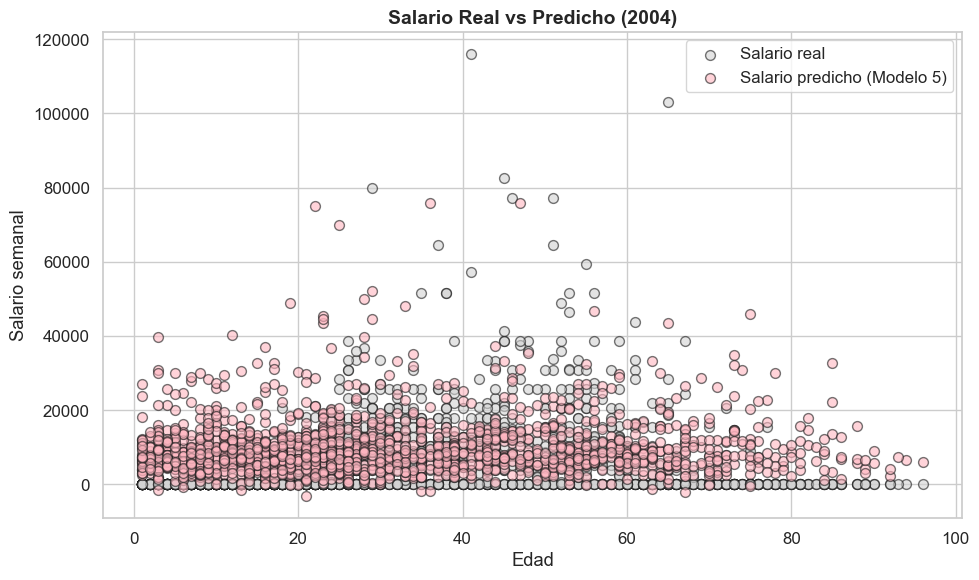

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ruta_x_test_2004 = r"C:\Users\HP\OneDrive\Documentos\Big data\TPS\TP4\bases_2004.xlsx"
ruta_pred_2004 = r"C:\Users\HP\OneDrive\Documentos\Big data\TPS\TP4\predicciones2_2004.xlsx"

x_test_2004 = pd.read_excel(ruta_x_test_2004, sheet_name="X_test_2004")

pred_2004 = pd.read_excel(ruta_pred_2004)

df_2004 = x_test_2004.merge(pred_2004, left_index=True, right_index=True, suffixes=('_real', '_pred'))

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

plt.figure(figsize=(10, 6))
plt.scatter(df_2004['edad'], df_2004['salario_semanal_real'], 
            color= "#D3D3D3", alpha=0.6, label='Salario real', edgecolor='k', s=50)
plt.scatter(df_2004['edad'], df_2004['Modelo_5'], 
            color="#FFB6C1", alpha=0.6, label='Salario predicho (Modelo 5)', edgecolor='k', s=50)

plt.xlabel('Edad')
plt.ylabel('Salario semanal')
plt.title('Salario Real vs Predicho (2004)', fontsize=14, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()

Utilizamos el modelo 5 en los dos casos porque es el que posee el mayor performance. 

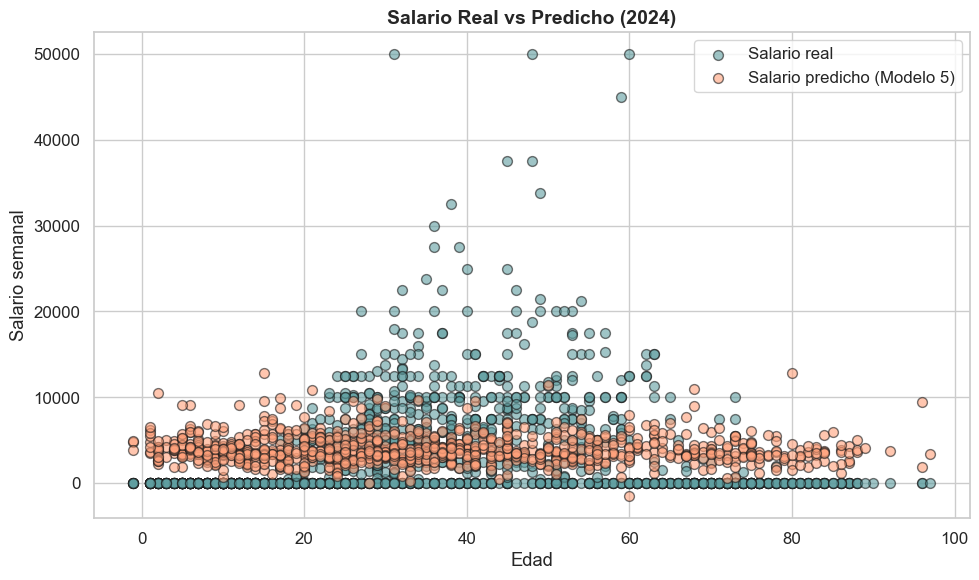

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ruta_x_test_2024 = r"C:\Users\HP\OneDrive\Documentos\Big data\TPS\TP4\bases_2024.xlsx"
ruta_pred_2024 = r"C:\Users\HP\OneDrive\Documentos\Big data\TPS\TP4\predicciones2_2024.xlsx"

x_test_2024 = pd.read_excel(ruta_x_test_2024, sheet_name="X_test_2024")
pred_2024 = pd.read_excel(ruta_pred_2024)

df_2024 = x_test_2024.merge(pred_2024, left_index=True, right_index=True, suffixes=('_real', '_pred'))

sns.set(style="whitegrid", palette="deep", font_scale=1.1)

plt.figure(figsize=(10, 6))

plt.scatter(df_2024['edad'], df_2024['salario_semanal_real'],
            color='#5F9EA0', alpha=0.6, label='Salario real', edgecolor='k', s=50)
plt.scatter(df_2024['edad'], df_2024['Modelo_5'],
            color='#FFA07A', alpha=0.6, label='Salario predicho (Modelo 5)', edgecolor='k', s=50)

plt.xlabel('Edad')
plt.ylabel('Salario semanal')
plt.title('Salario Real vs Predicho (2024)', fontsize=14, weight='bold')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
PUNTO 5

In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Cargarmos datos
X_train_2004 = pd.read_excel('Bases_2004.xlsx', sheet_name='X_train_2004')
X_train_2024 = pd.read_excel('Bases_2024.xlsx', sheet_name='X_train_2024')
y_train_2004 = pd.read_excel('Bases_2004.xlsx', sheet_name='y_train_2004').iloc[:, 0]
y_train_2024 = pd.read_excel('Bases_2024.xlsx', sheet_name='y_train_2024').iloc[:, 0]

# Eliminamos columnas 100% vacías
X_train_2024 = X_train_2024.loc[:, X_train_2024.notna().any()]
X_train_2004 = X_train_2004.loc[:, X_train_2004.notna().any()]

# Imputamos valores faltantes con media
imputer = SimpleImputer(strategy='mean')
X_train_2024_imputed = pd.DataFrame(imputer.fit_transform(X_train_2024), columns=X_train_2024.columns)
X_train_2004_imputed = pd.DataFrame(imputer.fit_transform(X_train_2004), columns=X_train_2004.columns)

# Resetear índices
X_train_2004_imputed.reset_index(drop=True, inplace=True)
y_train_2004.reset_index(drop=True, inplace=True)
X_train_2024_imputed.reset_index(drop=True, inplace=True)
y_train_2024.reset_index(drop=True, inplace=True)

# Entrenamos modelos
logit = LogisticRegression(max_iter=2000)
logit.fit(X_train_2024_imputed, y_train_2024)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_2004_imputed, y_train_2004)

# Predecimos
y_pred_logit_2024 = logit.predict(X_train_2024_imputed)
y_pred_knn_2004 = knn.predict(X_train_2004_imputed)

# Calculamos accuracy
acc_logit = accuracy_score(y_train_2024, y_pred_logit_2024)
acc_knn = accuracy_score(y_train_2004, y_pred_knn_2004)

# Obtenemos reportes completos
report_logit = classification_report(y_train_2024, y_pred_logit_2024, output_dict=True)
report_knn = classification_report(y_train_2004, y_pred_knn_2004, output_dict=True)

# Creamos DataFrames resumen
df_logit = pd.DataFrame(report_logit).transpose()
df_knn = pd.DataFrame(report_knn).transpose()

# Mostramos solo accuracy global en DataFrame separado
accuracy_summary = pd.DataFrame({
    'Modelo': ['Regresión Logística (2024)', 'KNN k=5 (2004)'],
    'Accuracy': [acc_logit, acc_knn]
})

print("Accuracy global de cada modelo:")
print(accuracy_summary)
print("\nReporte de clasificación Regresión Logística (2024):")
print(df_logit)
print("\nReporte de clasificación KNN (2004):")
print(df_knn)


L:\facultad\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy global de cada modelo:
                       Modelo  Accuracy
0  Regresión Logística (2024)  0.964576
1              KNN k=5 (2004)  0.939078

Reporte de clasificación Regresión Logística (2024):
              precision    recall  f1-score      support
0              0.965297  0.999202  0.981957  8769.000000
1              0.461538  0.018692  0.035928   321.000000
accuracy       0.964576  0.964576  0.964576     0.964576
macro avg      0.713418  0.508947  0.508942  9090.000000
weighted avg   0.947507  0.964576  0.948549  9090.000000

Reporte de clasificación KNN (2004):
              precision    recall  f1-score       support
0              0.943838  0.993683  0.968119   9657.000000
1              0.705314  0.203626  0.316017    717.000000
accuracy       0.939078  0.939078  0.939078      0.939078
macro avg      0.824576  0.598655  0.642068  10374.000000
weighted avg   0.927352  0.939078  0.923049  10374.000000


### los modelos lograron una alta precisión global, con un accuracy de aproximadamente 96.5% para la regresión logística y 93.9% para KNN, lo que indica que ambos funcionan bien en términos generales. Sin embargo, los datos están claramente desbalanceados, ya que la clase mayoritaria domina la muestra. Esto hace que el accuracy sea una métrica poco representativa para evaluar el desempeño en la clase minoritaria. La regresión logística apenas detecta casos de la clase minoritaria, reflejado en un recall muy bajo para esa clase, mientras que KNN mejora algo la detección pero sigue siendo insuficiente. Ambos modelos muestran buena precisión para la clase mayoritaria, pero no logran capturar bien la clase minoritaria, lo que afecta negativamente las métricas de recall y F1-score para dicha clase. Por ello, sería recomendable emplear técnicas para balancear las clases o ajustar los umbrales de decisión, y considerar métricas que reflejen mejor el desempeño en la clase minoritaria.

L:\facultad\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Matriz de Confusión Regresión Logística (2024):
[[3762    3]
 [ 129    3]]
Accuracy Regresión Logística (2024): 0.9661
AUC Regresión Logística (2024): 0.8435

Matriz de Confusión KNN k=5 (2004):
[[4077   52]
 [ 294   24]]
Accuracy KNN k=5 (2004): 0.9222
AUC KNN k=5 (2004): 0.7287


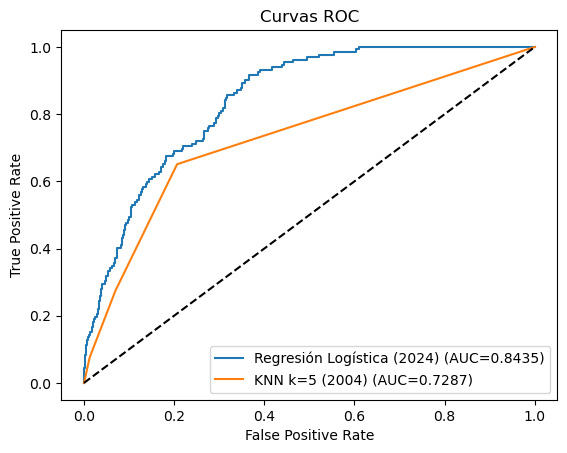

In [11]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Cargarmos los datos train (para entrenar) 
X_train_2004 = pd.read_excel('Bases_2004.xlsx', sheet_name='X_train_2004')
y_train_2004 = pd.read_excel('Bases_2004.xlsx', sheet_name='y_train_2004').iloc[:, 0]

X_train_2024 = pd.read_excel('Bases_2024.xlsx', sheet_name='X_train_2024')
y_train_2024 = pd.read_excel('Bases_2024.xlsx', sheet_name='y_train_2024').iloc[:, 0]

# Cargarmos los datos test 
X_test_2004 = pd.read_excel('Bases_2004.xlsx', sheet_name='X_test_2004')
y_test_2004 = pd.read_excel('Bases_2004.xlsx', sheet_name='y_test_2004').iloc[:, 0]

X_test_2024 = pd.read_excel('Bases_2024.xlsx', sheet_name='X_test_2024')
y_test_2024 = pd.read_excel('Bases_2024.xlsx', sheet_name='y_test_2024').iloc[:, 0]

# Eliminamos columnas vacías 
X_train_2024 = X_train_2024.loc[:, X_train_2024.notna().any()]
X_train_2004 = X_train_2004.loc[:, X_train_2004.notna().any()]
X_test_2024 = X_test_2024[X_train_2024.columns]  # asegurar mismas columnas que train
X_test_2004 = X_test_2004[X_train_2004.columns]

# Imputamos valores faltantes
imputer_2024 = SimpleImputer(strategy='mean')
X_train_2024_imputed = pd.DataFrame(imputer_2024.fit_transform(X_train_2024), columns=X_train_2024.columns)
X_test_2024_imputed = pd.DataFrame(imputer_2024.transform(X_test_2024), columns=X_train_2024.columns)

imputer_2004 = SimpleImputer(strategy='mean')
X_train_2004_imputed = pd.DataFrame(imputer_2004.fit_transform(X_train_2004), columns=X_train_2004.columns)
X_test_2004_imputed = pd.DataFrame(imputer_2004.transform(X_test_2004), columns=X_train_2004.columns)

# Entrenamos modelos ---
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train_2024_imputed, y_train_2024)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_2004_imputed, y_train_2004)

# Predecimos lax probabilidades ---
probs_logit_2024 = logit.predict_proba(X_test_2024_imputed)[:, 1]
probs_knn_2004 = knn.predict_proba(X_test_2004_imputed)[:, 1]

# Predicciones con umbral 0.5 
y_pred_logit_2024 = (probs_logit_2024 > 0.5).astype(int)
y_pred_knn_2004 = (probs_knn_2004 > 0.5).astype(int)

# Métricas 
def print_metrics(y_true, y_pred, probs, modelo):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    auc = roc_auc_score(y_true, probs)

    print(f"\nMatriz de Confusión {modelo}:")
    print(cm)
    print(f"Accuracy {modelo}: {acc:.4f}")
    print(f"AUC {modelo}: {auc:.4f}")

    fpr, tpr, _ = roc_curve(y_true, probs)
    plt.plot(fpr, tpr, label=f'{modelo} (AUC={auc:.4f})')

# Mostramos resultados 
print_metrics(y_test_2024, y_pred_logit_2024, probs_logit_2024, "Regresión Logística (2024)")
print_metrics(y_test_2004, y_pred_knn_2004, probs_knn_2004, "KNN k=5 (2004)")

# Graficamos curvas ROC 
plt.plot([0, 1], [0, 1], 'k--')  # línea diagonal referencia
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.show()


### En conclusión, si se prioriza la precisión global y una buena separación entre clases, el modelo de regresión logística para el año 2024 es el más adecuado. En cambio, si el objetivo es identificar la mayor cantidad posible de casos positivos incluso aceptando un mayor número de errores, el modelo KNN para el año 2004 muestra mejor desempeño en este aspecto. La elección final del modelo más apropiado dependerá, por lo tanto, de los objetivos específicos del análisis y del costo relativo de los diferentes tipos de error.

In [13]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Cargarmos datos de entrenamiento (2024) 
X_train_2024 = pd.read_excel('Bases_2024.xlsx', sheet_name='X_train_2024')
y_train_2024 = pd.read_excel('Bases_2024.xlsx', sheet_name='y_train_2024').iloc[:, 0]

# Cargarmos datos de no respondientes ---
X_norsp_2024 = pd.read_excel('Bases_2024.xlsx', sheet_name='X_test_2024')
y_norsp_2024 = pd.read_excel('Bases_2024.xlsx', sheet_name='y_test_2024').iloc[:, 0]  # si querés comparar después

# Aseguraramos mismas columnas y limpiar
X_train_2024 = X_train_2024.loc[:, X_train_2024.notna().any()]
X_norsp_2024 = X_norsp_2024[X_train_2024.columns]

# imputamos
imputer = SimpleImputer(strategy='mean')
X_train_2024_imputed = pd.DataFrame(imputer.fit_transform(X_train_2024), columns=X_train_2024.columns)
X_norsp_2024_imputed = pd.DataFrame(imputer.transform(X_norsp_2024), columns=X_train_2024.columns)

# Entrenamos modelos
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train_2024_imputed, y_train_2024)

# predecimos
y_pred_norsp = logit.predict(X_norsp_2024_imputed)

# Calculamos la proporción de desocupados ---
num_desocupados = (y_pred_norsp == 1).sum()
total_norsp = len(y_pred_norsp)
proporcion_desocupados = num_desocupados / total_norsp

# Mostramos resultados
print(f"Número de personas clasificadas como desocupadas: {num_desocupados}")
print(f"Total de personas que no respondieron: {total_norsp}")
print(f"Proporción estimada de desocupados entre no respondientes: {proporcion_desocupados:.4f}")


Número de personas clasificadas como desocupadas: 6
Total de personas que no respondieron: 3897
Proporción estimada de desocupados entre no respondientes: 0.0015


L:\facultad\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Utilizamos el modelo de regresión logística con los datos del año 2024, se realizó la predicción sobre la base de personas que no respondieron. De un total de 3897 individuos, el modelo identificó 6 personas como desocupadas. Esto representa una proporción estimada de desocupados del 0.15% entre los no respondientes. Este bajo porcentaje sugiere que, según el modelo, la mayoría de los no respondientes probablemente no se encuentran en situación de desocupación.
